# Yongjie's CA2-Unsupervised Model

Name: Li Yongjie

ID: 2342377

Class: DAAA/FT/1B/01

## Objective
Use unsupervised learning to group the students into multiple clusters so that we can cater needs
for different students

<hr>

### Importing the neccessary libraries

In [43]:
import os
os.environ["OMP_NUM_THREADS"] = "1" # Set this before importing sklearn

# Import necassary libraries
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sklearn Libraries
import sklearn
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

# Others
from typing import Sequence, Tuple
from itertools import combinations, chain
from sklearn.manifold import TSNE

# from kmodes.kprototypes import KPrototypes

df = pd.read_csv("./Student_Performance_dataset.csv")

print(df.head(5))

   Student_ID  Gender  Age  English_Score  Math_Score  Science_Score
0           1  Female   18           64.0        56.0             60
1           2  Female   12           89.0        71.0             97
2           3  Female   18           69.0        69.0             80
3           4  Female   17           60.0        72.0             97
4           5    Male   13           71.0        76.0             76


In [44]:
# Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sklearn Libraries
import sklearn
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Others
from typing import Sequence, Tuple
from itertools import combinations, chain

In [45]:
sns.set_theme(palette='bright')
# Set the style for plots
plt.style.use('seaborn-v0_8-darkgrid')

<hr>

### Exploratory Data Analysis
<hr>

We will conduct an exploratory data analysis to gain insights into the characteristics of the dataset. Our focus will primarily be on understanding how each feature relates to the one another and identify and paterns or trends.

This dataset pertains to student performance and contains 1000 data points with 6 columns:

*   **Student\_ID**: Unique identifier for each student
*   **Gender**: Student's gender
*   **Age**: Student's age
*   **English\_Score**: Student's score in English subject
*   **Math\_Score**: Student's score in Math subject
*   **Science\_Score**: Student's score in Science subject

In [46]:
df.drop(columns='Student_ID', inplace=True)

In [47]:
# Get description 
df.describe()

,Age,English_Score,Math_Score,Science_Score
count,1000.000000,971.000000,967.000000,1000.000000
mean,14.970000,76.089598,76.660807,76.370000
std,1.959832,12.767113,12.541226,12.866649
min,12.000000,55.000000,55.000000,55.000000
25%,13.000000,65.000000,66.000000,65.000000
50%,15.000000,76.000000,76.000000,77.000000
75%,17.000000,88.000000,87.500000,87.000000
max,18.000000,98.000000,98.000000,98.000000


In [48]:
df.dtypes

Gender            object
Age                int64
English_Score    float64
Math_Score       float64
Science_Score      int64
dtype: object

In [49]:
df['Gender'].unique()

array(['Female', 'Male', 'Genderqueer', 'Non-binary', 'Agender',
       'Bigender', 'Genderfluid', 'Polygender'], dtype=object)

In [50]:
df.isnull().sum()

Gender            0
Age               0
English_Score    29
Math_Score       33
Science_Score     0
dtype: int64

In [51]:
df_eda = df.copy()

<hr>

### Univariate Analyisis
<hr>

We will now do univariate analysis to find out more about each feature

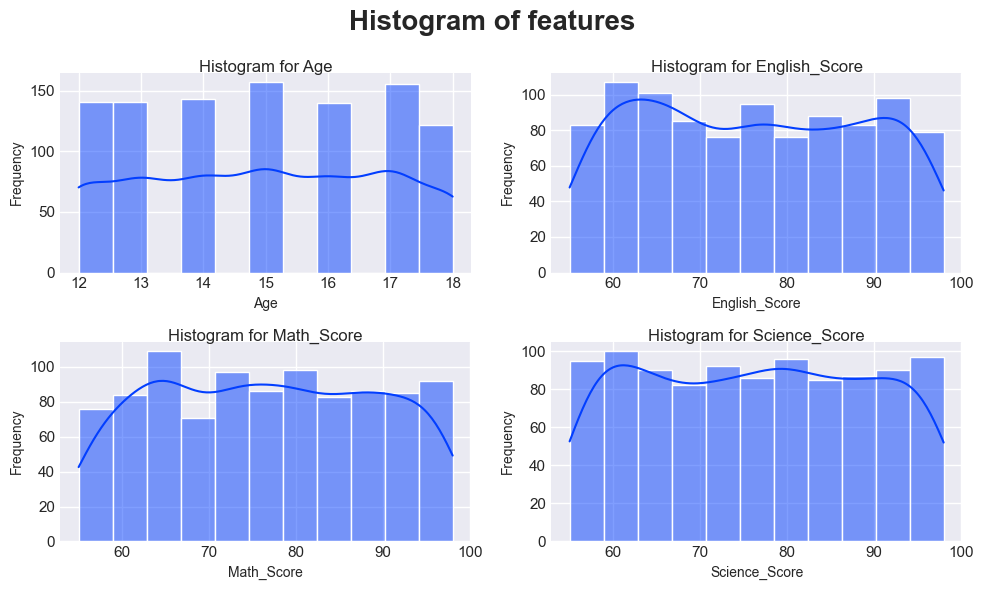

In [52]:
fig, axs = plt.subplots(2, 2 , tight_layout=False, figsize=(10, 6))

for i, (col, ax) in enumerate(zip(df_eda.columns[1:], axs.flatten())):
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.set_title(f"Histogram for {col}", fontsize=12, pad=0.4)
    
plt.suptitle("Histogram of features", fontsize=20, fontweight='bold')
plt.show()

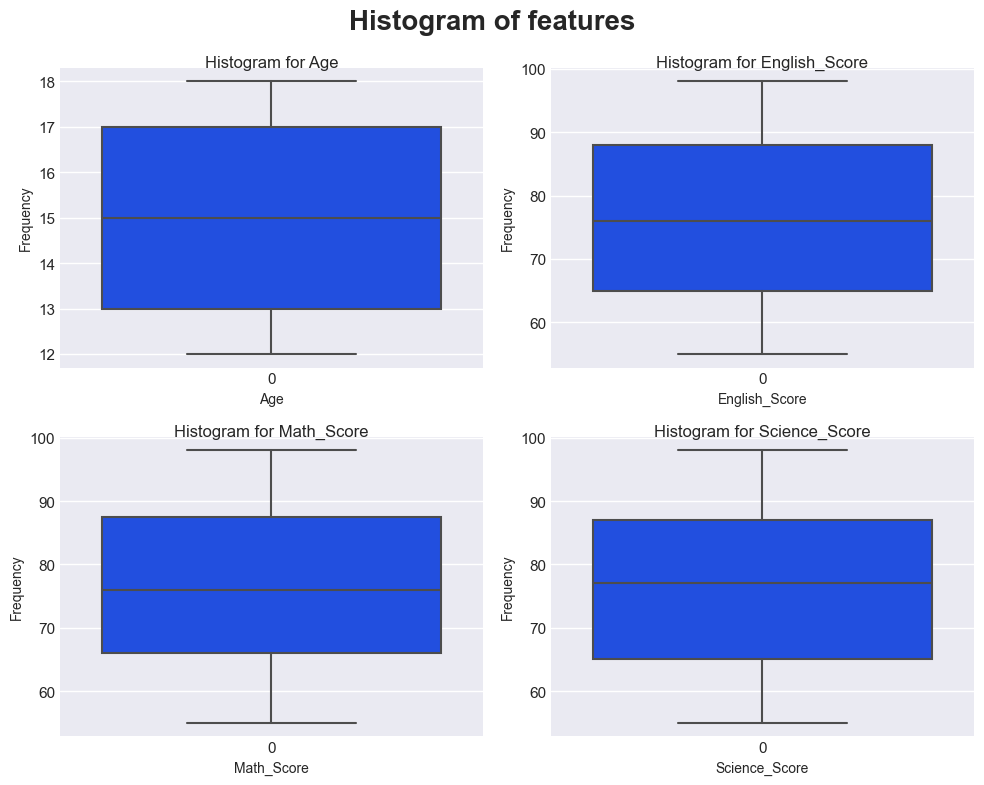

In [53]:
fig, axs = plt.subplots(2, 2 , tight_layout=False, figsize=(10, 8))

for i, (col, ax) in enumerate(zip(df_eda.columns[1:], axs.flatten())):
    sns.boxplot(df[col], ax=ax)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.set_title(f"Histogram for {col}", fontsize=12, pad=0.4)
    
plt.suptitle("Histogram of features", fontsize=20, fontweight='bold')
plt.show()

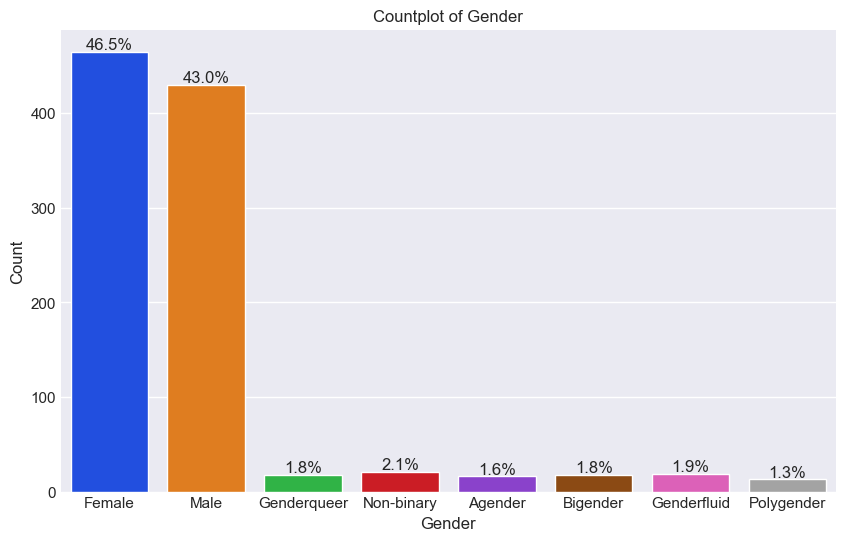

In [54]:
# Calculate the percentage of each gender
percentages = df['Gender'].value_counts(normalize=True) * 100

# Plot the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Gender')

# Add percentages as text labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/len(df)*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

ax.set(xlabel='Gender', ylabel='Count')
plt.title('Countplot of Gender')
plt.show()

In [55]:
def groupNonBinaryGender(name):
    if name != 'Female' and name!= "Male":
        return "Others"
    else:
        return name
    
df['Gender'] = df['Gender'].apply(groupNonBinaryGender)

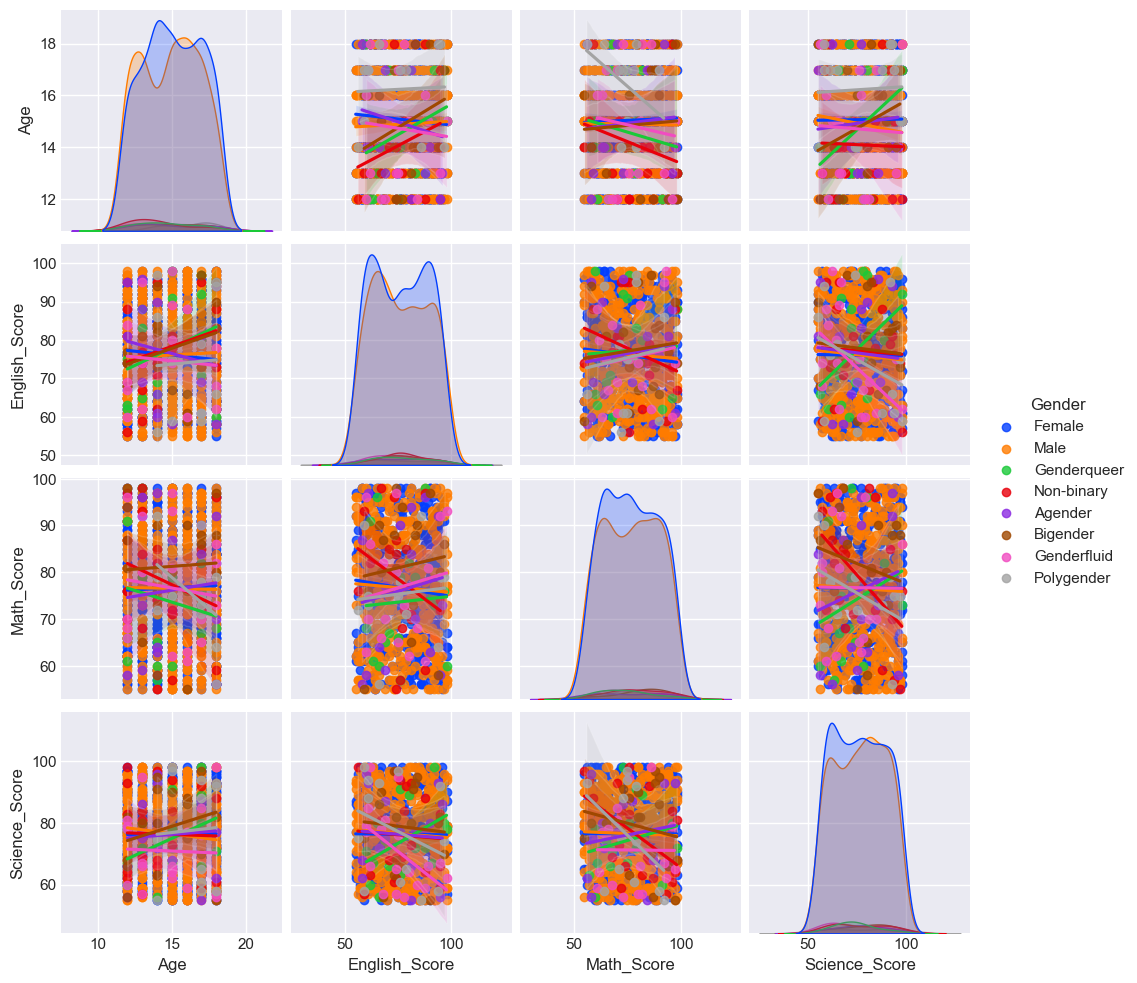

In [56]:
sns.pairplot(df_eda, kind='reg', hue='Gender')
plt.show()

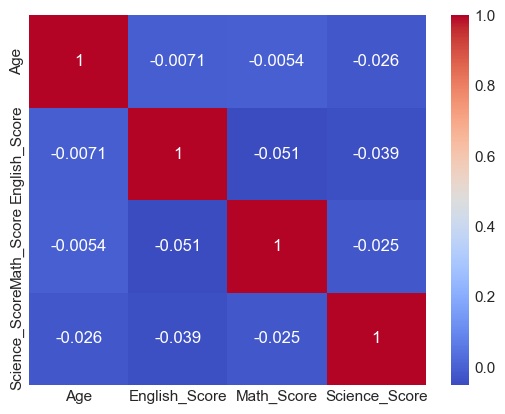

In [57]:
sns.heatmap(df_eda.drop(columns='Gender').corr(), annot=True, cmap='coolwarm')
plt.show()

### Imputing missing data

In [58]:
from sklearn.impute import SimpleImputer
cols = ['English_Score', 'Math_Score']
imputer = SimpleImputer(strategy='mean')
df.loc[:,cols] = imputer.fit_transform(df[cols])

### Getting average score

In [59]:
df['Average score'] = df[['English_Score', 'Math_Score', 'Science_Score']].mean(axis=1)
df

,Gender,Age,English_Score,Math_Score,Science_Score,Average score
0,Female,18,64.0,56.0,60,60.000000
1,Female,12,89.0,71.0,97,85.666667
2,Female,18,69.0,69.0,80,72.666667
3,Female,17,60.0,72.0,97,76.333333
4,Male,13,71.0,76.0,76,74.333333
...,...,...,...,...,...,...
995,Female,14,64.0,55.0,77,65.333333
996,Others,14,66.0,60.0,56,60.666667
997,Male,16,82.0,81.0,74,79.000000
998,Male,14,76.0,62.0,62,66.666667


### Scaling the data

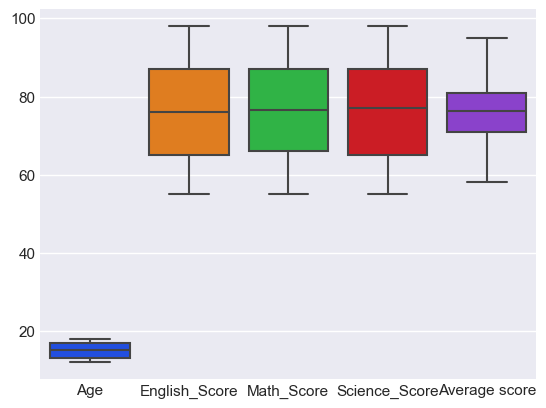

In [60]:
sns.boxplot(df)
plt.show()

In [61]:
scale = StandardScaler()
col=list(df.drop(columns='Gender').columns)
df_scaled = df.copy()
df_scaled[col] = scale.fit_transform(df_scaled[col])

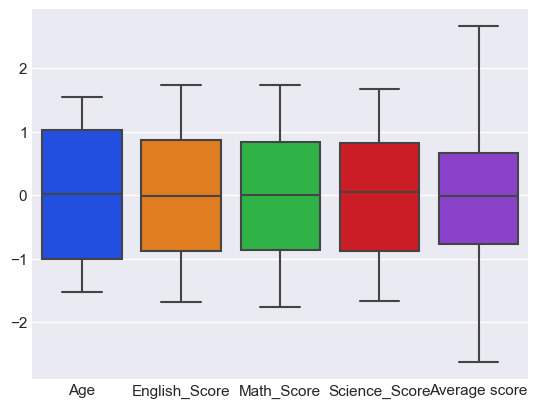

In [62]:
sns.boxplot(df_scaled)
plt.show()

### K-means Clustering

In [ ]:
df_scaled.drop(columns={"Gender"}, inplace=True)

In [63]:
df_scaled.rename(columns={"English_Score": "Eng", "Math_Score": "Math", "Science_Score":"Sci", "Average score": "Avg", "Gender_Male":"Male", "Gender_Others":"Others"}, inplace=True)

In [64]:
df_scaled = pd.get_dummies(df_scaled)
df_scaled

,Age,Eng,Math,Sci,Avg,Gender_Female,Gender_Male,Gender_Others
0,1.546825,-0.961465,-1.676173,-1.272918,-2.341717,True,False,False
1,-1.516194,1.026742,-0.459251,1.604172,1.329104,True,False,False
2,1.546825,-0.563823,-0.621507,0.282266,-0.530143,True,False,False
3,1.036321,-1.279578,-0.378123,1.604172,-0.005740,True,False,False
4,-1.005691,-0.404767,-0.053610,-0.028771,-0.291778,False,True,False
...,...,...,...,...,...,...,...,...
995,-0.495188,-0.961465,-1.757301,0.048988,-1.578949,True,False,False
996,-0.495188,-0.802408,-1.351660,-1.583955,-2.246371,False,False,True
997,0.525818,0.470044,0.352031,-0.184289,0.375644,False,True,False
998,-0.495188,-0.007126,-1.189404,-1.117400,-1.388257,False,True,False


<hr>

### Finding K

In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples

def plot_optimalK(data):
    # Calculate the within-cluster sum of squares (inertia) for different number of clusters
    inertia = []
    for i in range(1, 15):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=10).fit(data)
        inertia.append(kmeans.inertia_)

    # Calculate siholute scores
    scores = []
    k_list = []
    for i, k in enumerate(np.arange(2,15)):
        # Perform k-means clustering
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(data)
        cluster_labels = kmeans.labels_

        # Calculate the silhouette score
        silhouette_avg = silhouette_score(data, cluster_labels)

        # Compute the silhoutte scores for each sample
        sample_silhoutte_values = silhouette_samples(data, cluster_labels)
        scores.append(silhouette_avg)
        k_list.append(k)
        
    fig, ax = plt.subplots(1,2, figsize=(12, 4))

    ax[0].set_title("Elbow Method For Optimal k")
    ax[0].set_xlabel("Inertia")
    ax[0].plot(range(1,15), inertia, marker='o', linestyle='-')

    ax[1].set_title("Silhouette Coefficient")
    ax[1].set_ylabel("Silhouette Coefficient")
    ax[1].set_xlabel("k")
    sns.lineplot(y=scores, x=k_list, marker='o', ax=ax[1])

    plt.suptitle("Fidning Optimal K")

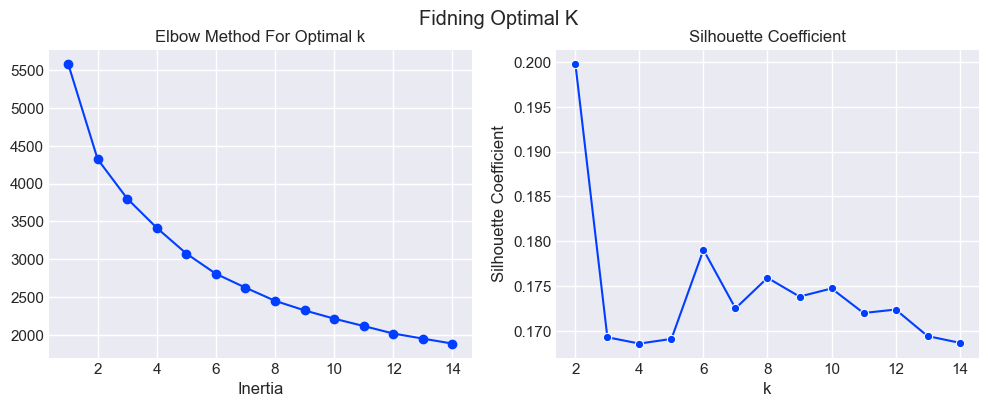

In [66]:
plot_optimalK(df_scaled)

In [67]:
df_pca = df_scaled.copy()
df_pca

pca = PCA(n_components = 2)
pca_result = pca.fit_transform(df_scaled)
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f"PC{i+1}" for i in range(2)])

# Display the PCA results
print("\nPCA Results:")
pca_df


PCA Results:


,PC1,PC2
0,-3.305047,0.528015
1,1.903546,0.564767
2,-0.778622,-0.094622
3,-0.007324,-1.170689
4,-0.363454,-0.362997
...,...,...
995,-2.158503,0.096440
996,-3.107281,0.423946
997,0.494978,0.278314
998,-1.919944,0.864527


In [126]:
palette = ['#211C6A', '#59B4C3','#74E291', '#9F70FD', '#294B29', '#E3651D', 'red', 'blue']

def plot_loading_plot(data, pca, width=5, height=5, margin=0.25, ax=None):
    # Set limits for figure
    x_min = min(pca.components_[0, :].min(), 0)-margin
    x_max = max(pca.components_[0, :].max(), 0)+margin
    y_min = min(pca.components_[1, :].min(), 0)-margin
    y_max = max(pca.components_[1, :].max(), 0)+margin
    if ax is None:
        fig, ax = plt.subplots(figsize=(width, height))
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
    # Give each component own color for legend
    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.05,
                 head_length=0.1, linewidth=2, color=palette[i], label=data.columns[i])
   
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_title("Loading plot", fontweight='bold')
    plt.legend(
        loc='upper left',
        bbox_to_anchor=(1, 1),
        fancybox=True,
        shadow=True,
        ncol=2)
    return ax

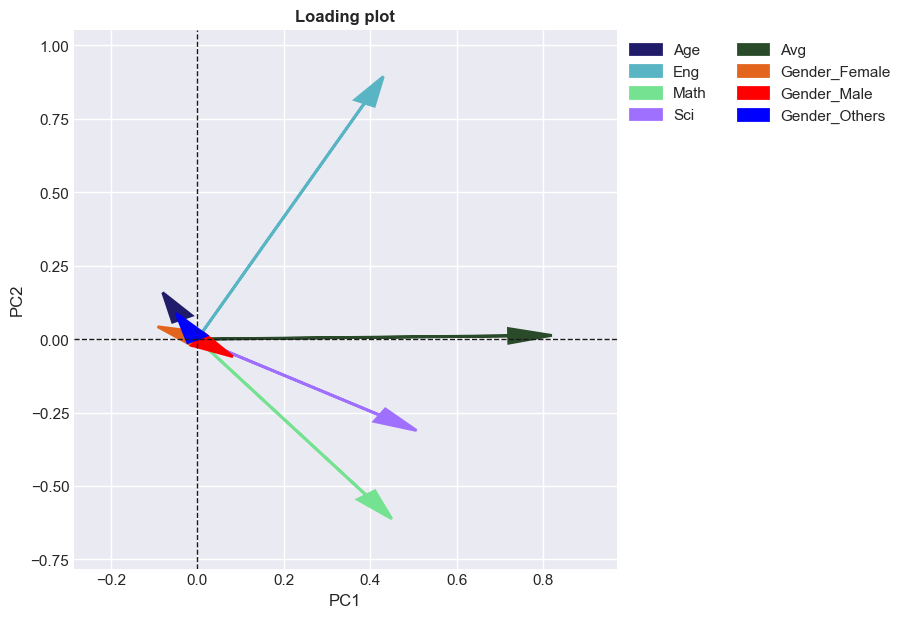

In [127]:
plt.clf
plot_loading_plot(df_scaled, pca, width=7, height=7)
plt.show() 

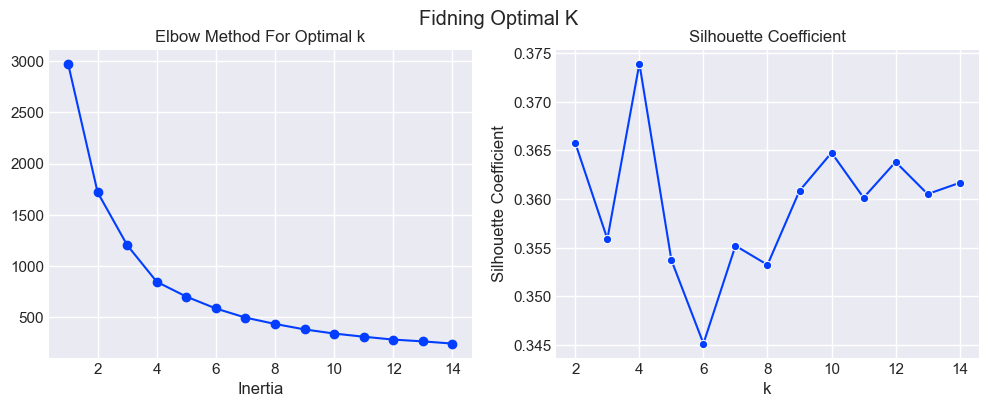

In [68]:
plot_optimalK(pca_df)

In [69]:
optimal_perplexity = round(np.sqrt(df_scaled.shape[0]))
tsne = TSNE(learning_rate=50, perplexity=optimal_perplexity, random_state=42)
tsne_features = pd.DataFrame(tsne.fit_transform(df_scaled))
tsne_features

,0,1
0,-32.018574,-19.607676
1,13.282630,-11.732360
2,-22.265400,-25.181206
3,8.330460,-26.647490
4,-11.571797,4.020807
...,...,...
995,-16.293316,-20.329222
996,-24.613831,-3.802259
997,24.621782,9.468085
998,-26.141388,14.983177


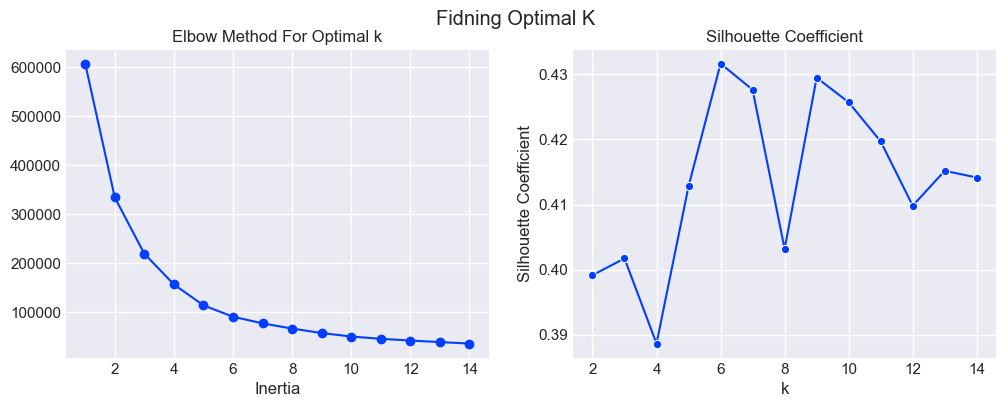

In [70]:
plot_optimalK(tsne_features)

<hr>

### K-Means Clustering
<hr>

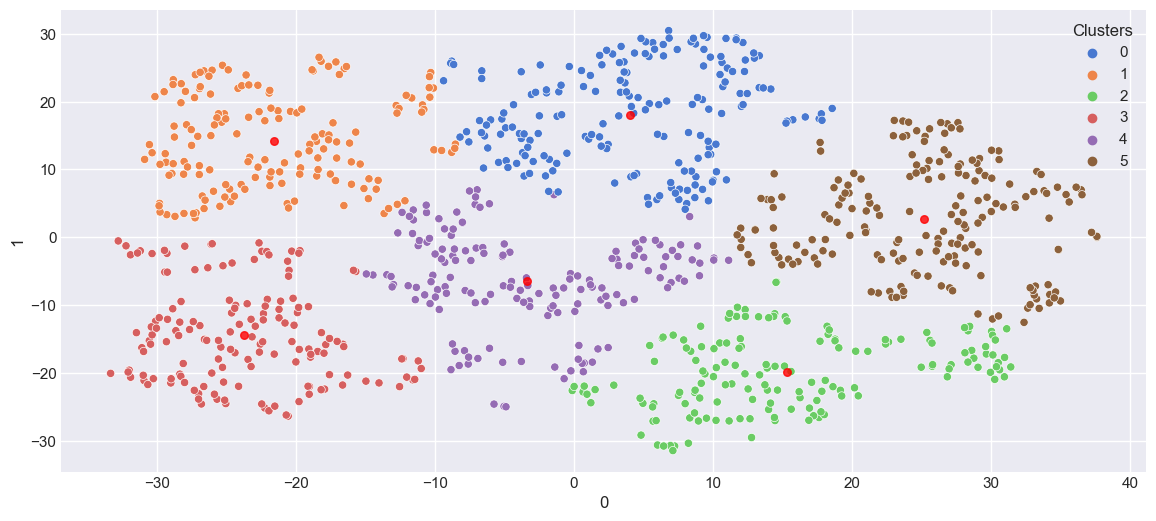

Silhouette Score(n=6): 0.43167340755462646


In [134]:
# fit a Kmeans model to the data
kMeansModel = KMeans(n_clusters=6, n_init=10)
kMeansModel.fit(tsne_features)

# Visualize the results
plt.figure(figsize=(14,6))
sns.scatterplot(x=tsne_features[0], y=tsne_features[1], hue=kMeansModel.labels_, palette='muted')

centers = kMeansModel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=30, alpha=0.8)
plt.legend(title='Clusters')
plt.show()

print(f'Silhouette Score(n=6): {silhouette_score(tsne_features, kMeansModel.labels_)}')

<hr>

### Hierichal Clustering

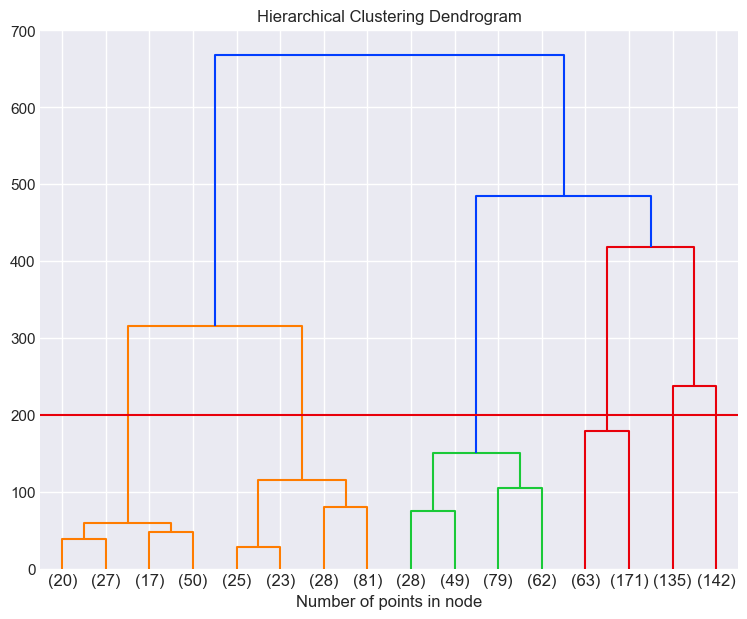

In [72]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # cCeate the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
agg_cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(tsne_features)

plt.figure(figsize = (9,7))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agg_cluster, truncate_mode='level', p=3)
plt.hlines(200, 0, 300, colors = 'r') # Plotting the clutering line with optimal seperation
plt.xlabel("Number of points in node")
plt.show()

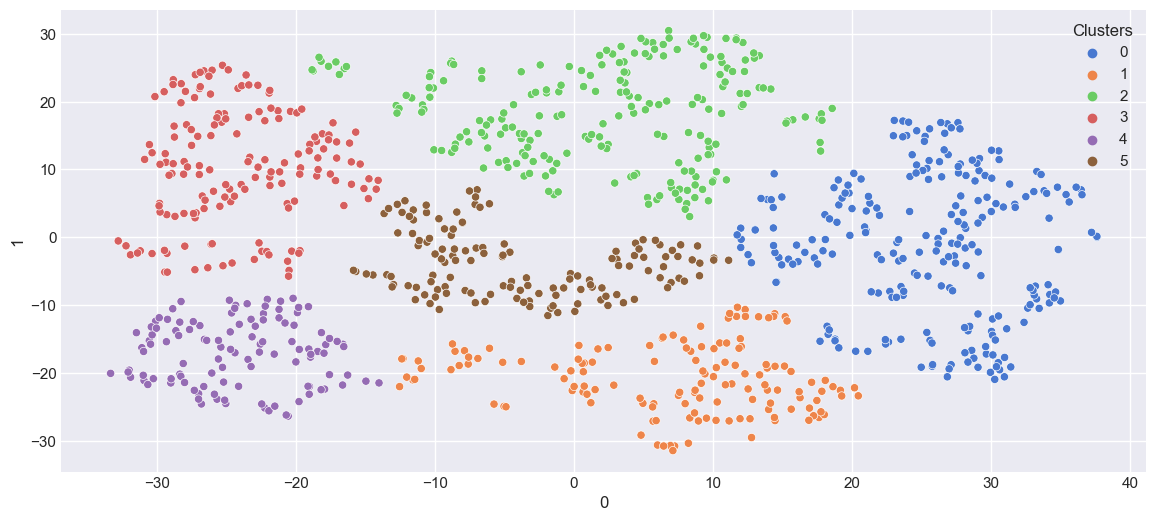

Silhouette Score(n=7): 0.418669193983078


In [85]:
hierarchical = AgglomerativeClustering(n_clusters=6)
hierarchical.fit_predict(tsne_features)

# Visualize the results
plt.figure(figsize=(14,6))

sns.scatterplot(x=tsne_features[0], y=tsne_features[1], hue=hierarchical.labels_, palette='muted')
plt.legend(title='Clusters')
plt.show()
print(f'Silhouette Score(n=7): {silhouette_score(tsne_features, hierarchical.labels_)}')


<hr>

### GMM Clustering

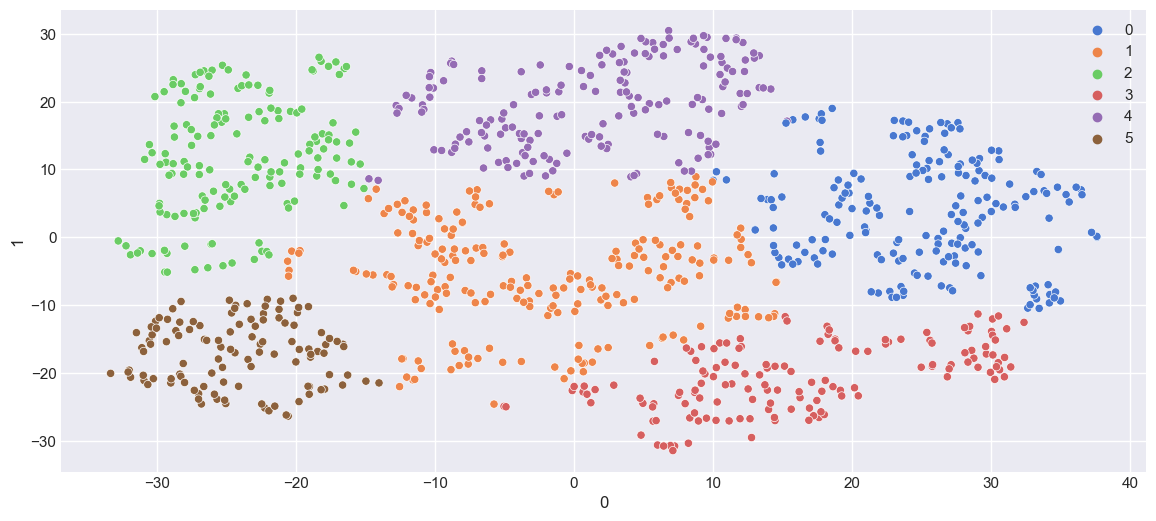

Silhouette Score(n=6): 0.40704572200775146


In [135]:
gmmModel = GaussianMixture(n_components=6, random_state=0)
gmmModel.fit(tsne_features)
labels = gmmModel.predict(tsne_features)

# Plotting
plt.figure(figsize=(14,6))
sns.scatterplot(x=tsne_features[0], y=tsne_features[1], hue=labels, palette='muted')

plt.show()
print(f'Silhouette Score(n=6): {silhouette_score(tsne_features, labels)}')


<hr>

### Spectral Clustering
<hr>

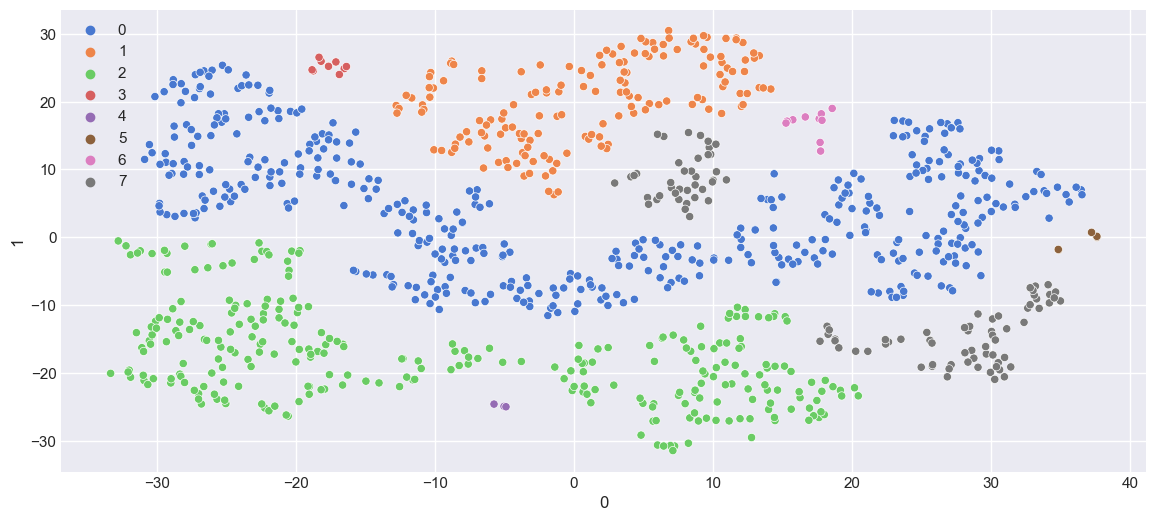

Silhouette Score(n=7): -0.20767436921596527


In [86]:
spectralClusteringModel = SpectralClustering(n_components=6, random_state=0)
spectralClusteringModel.fit(tsne_features)

# Plotting
plt.figure(figsize=(14,6))
sns.scatterplot(x=tsne_features[0], y=tsne_features[1], hue=spectralClusteringModel.labels_, palette='muted')

plt.show()
print(f'Silhouette Score(n=7): {silhouette_score(tsne_features, spectralClusteringModel.labels_)}')

<hr>

### Hyperparameter tuning
<hr>

In [76]:
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

In [128]:
#KMeans Param Grid
param_grid = {
    'n_clusters': [6],
    'init': ['k-means++', 'random'],
    'max_iter': [150, 350, 550],
    'n_init': [15, 25, 35]
}

# Create an instance of KMeans and GridSearchCV
model = KMeans(random_state=42)
km_grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=silhouette_scorer, n_jobs=-1)

km_grid_search.fit(tsne_features)

print("Best Parameters:", km_grid_search.best_params_)
print("Best Score:", km_grid_search.best_score_)

Best Parameters: {'init': 'random', 'max_iter': 150, 'n_clusters': 6, 'n_init': 15}
Best Score: 0.43802648186683657


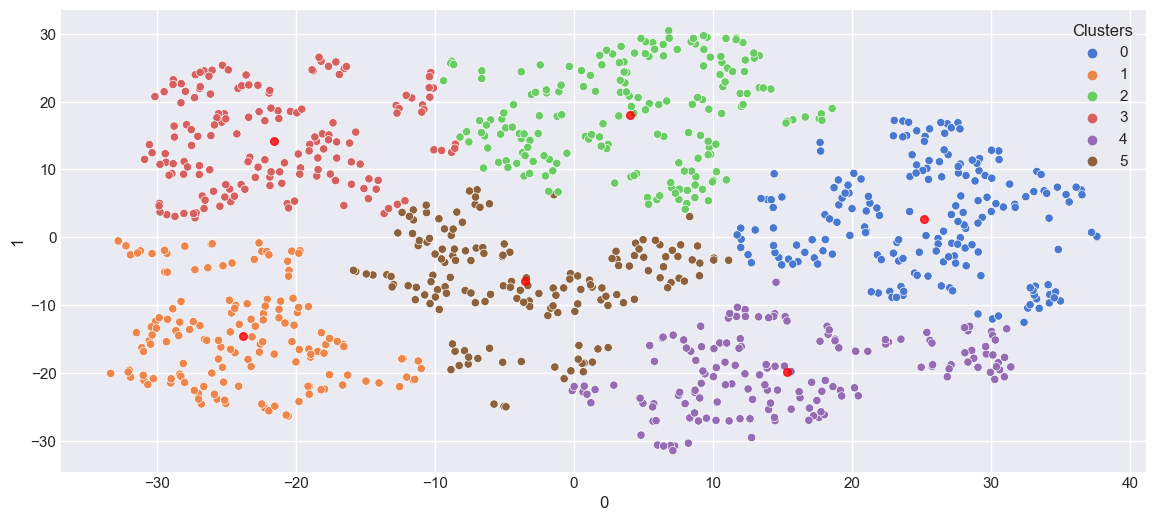

Silhouette Score(n=6): 0.43215441703796387


In [129]:
kmeans_hypertune_model = KMeans(init='k-means++', max_iter= 150, n_clusters=6, n_init= 15)
kmeans_hypertune_model.fit(tsne_features)

# Visualize the results
plt.figure(figsize=(14,6))
sns.scatterplot(x=tsne_features[0], y=tsne_features[1], hue=kmeans_hypertune_model.labels_, palette='muted')

centers = kmeans_hypertune_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=30, alpha=0.8)
plt.legend(title='Clusters')
plt.show()

print(f'Silhouette Score(n=6): {silhouette_score(tsne_features, kmeans_hypertune_model.labels_)}')

<hr>

### Intperating Clustering
<hr>

#### Final Model

Since our model remained the same we will stick 

In [130]:
df_eveluate = df.copy()
df_eveluate['Cluster'] = kmeans_hypertune_model.labels_

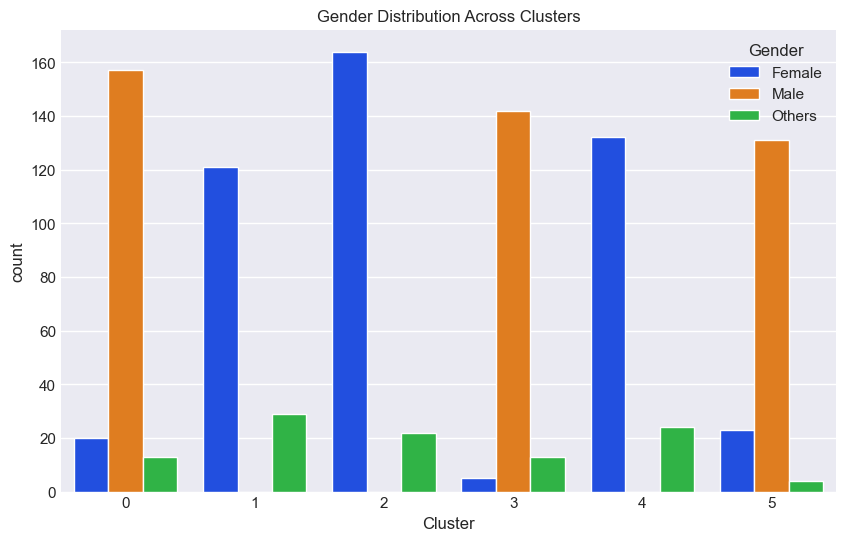

In [131]:
# Gender distribution in each cluster
plt.figure(figsize=(10,6))
plt.title('Gender Distribution Across Clusters')
sns.countplot(data=df_eveluate, x='Cluster', hue='Gender')

plt.show()

In [132]:
df_eveluate.drop(columns='Gender', inplace=True)

In [133]:
cluster_centers = df_eveluate.groupby('Cluster').mean()
cluster_centers['Cluster Size (% of Total)'] = pd.Series(df_eveluate['Cluster']).value_counts() / len(df_eveluate['Cluster']) * 100

cluster_centers

,Age,English_Score,Math_Score,Science_Score,Average score,Cluster Size (% of Total)
Cluster,,,,,,
0,14.557895,86.171250,82.754232,83.352632,84.092705,19.0
1,15.320000,71.207861,66.330955,66.760000,68.099605,15.0
2,14.774194,80.663699,82.146796,69.801075,77.537190,18.6
3,14.887500,73.647110,75.499670,62.656250,70.601010,16.0
4,15.839744,76.348451,76.696431,91.083333,81.376072,15.6
5,14.588608,65.433782,73.822562,84.189873,74.482073,15.8


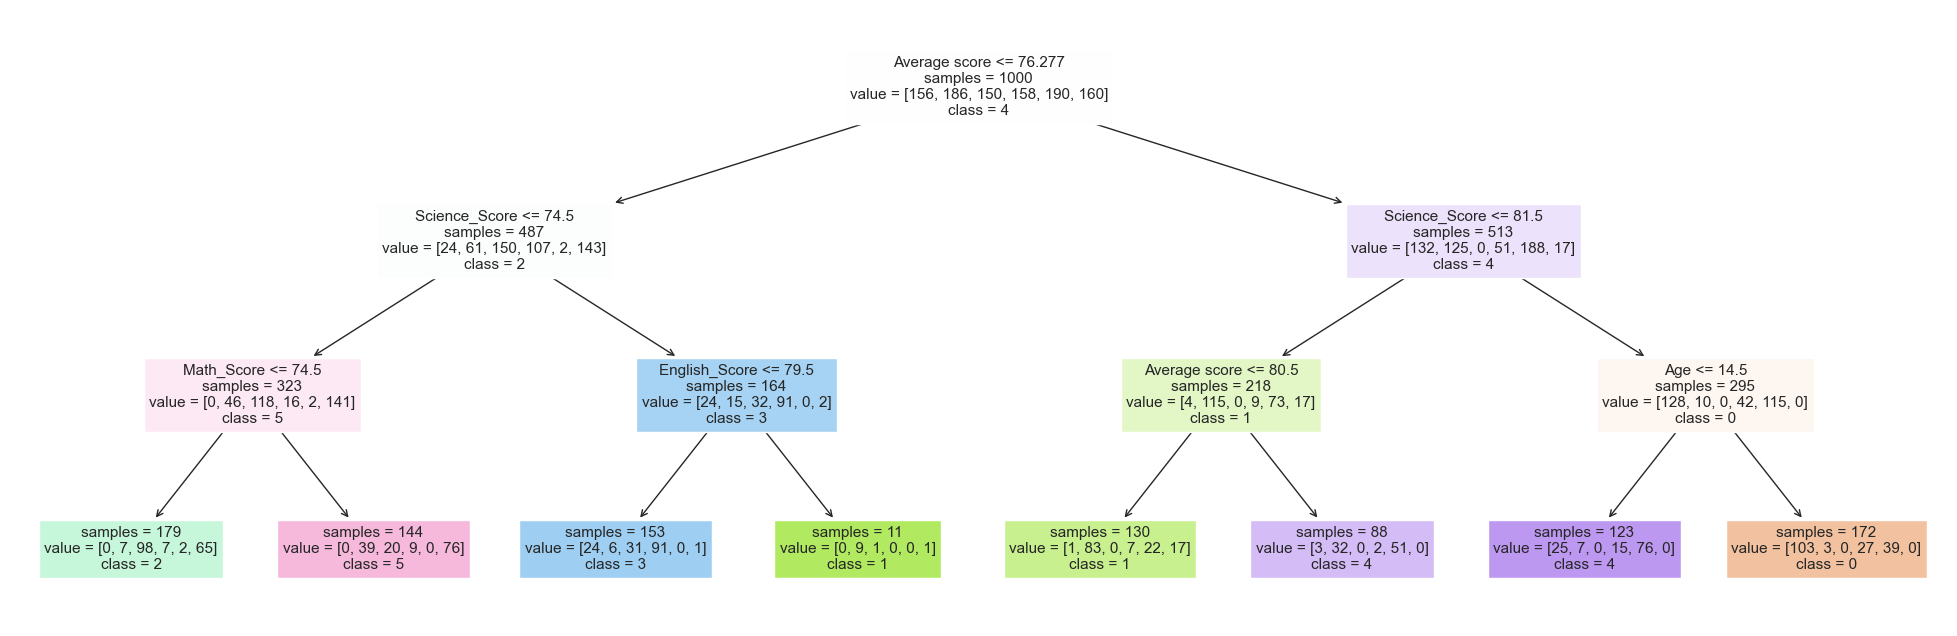

In [95]:
# Defining the model
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
clf.fit(df_eveluate.drop(columns='Cluster'), df_eveluate['Cluster'])

# Plotting the decision tree
fig, ax = plt.subplots(figsize = (25,8))
plot_tree(
            clf,
            feature_names = df_eveluate.drop(columns='Cluster').columns,
            class_names= np.unique(df_eveluate['Cluster'].values.astype(str)),
            impurity=False,
            filled = True, 
            ax = ax, 
            fontsize=11
            )
plt.show()